In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [4]:
!pip install timm

     |████████████████████████████████| 376 kB 5.4 MB/s 


In [26]:
import timm
print("Available Vision Transformer Models: ")
print(timm.list_models("vit*"))

Available Vision Transformer Models: 
['vit_base_patch16_224', 'vit_base_patch16_224_in21k', 'vit_base_patch16_224_miil', 'vit_base_patch16_224_miil_in21k', 'vit_base_patch16_384', 'vit_base_patch32_224', 'vit_base_patch32_224_in21k', 'vit_base_patch32_384', 'vit_base_r26_s32_224', 'vit_base_r50_s16_224', 'vit_base_r50_s16_224_in21k', 'vit_base_r50_s16_384', 'vit_base_resnet26d_224', 'vit_base_resnet50_224_in21k', 'vit_base_resnet50_384', 'vit_base_resnet50d_224', 'vit_huge_patch14_224_in21k', 'vit_large_patch16_224', 'vit_large_patch16_224_in21k', 'vit_large_patch16_384', 'vit_large_patch32_224', 'vit_large_patch32_224_in21k', 'vit_large_patch32_384', 'vit_large_r50_s32_224', 'vit_large_r50_s32_224_in21k', 'vit_large_r50_s32_384', 'vit_small_patch16_224', 'vit_small_patch16_224_in21k', 'vit_small_patch16_384', 'vit_small_patch32_224', 'vit_small_patch32_224_in21k', 'vit_small_patch32_384', 'vit_small_r26_s32_224', 'vit_small_r26_s32_224_in21k', 'vit_small_r26_s32_384', 'vit_small_resn

In [34]:
import typing
import io
import os
import pickle
import json

import timm
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt

from PIL import Image
from torchvision import transforms

from collections import defaultdict
import copy
import random
import os
import shutil
from urllib.request import urlretrieve

import albumentations as A
#from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

cudnn.benchmark = True

import os 
import pandas as pd
from PIL import Image
import numpy as np
import cv2
# path="/content/drive/MyDrive/DFUC2021_train/images"
# pathcsv="/content/drive/MyDrive/DFUC2021_train/Training_list1.csv"
# readptah=pd.read_csv(pathcsv)
# sample=readptah.values.tolist()[0]
# img,label=sample
# img=np.array(Image.open(os.path.join(path,img)))

# import matplotlib.pyplot as plt
# img.shape
#imge1=img[:,:,1]
#plt.imshow(imge1)

#!pip install albumentations

#! pip install albumentations==0.4.6
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#dataset
import torch
import albumentations as A
#from albumentations.pytorch.transforms import ToTensorV2
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from PIL import Image
# Prepare Model
#vit_model = timm.create_model('vit_large_patch16_384', pretrained=True).to("cuda")

import timm
print("Available Vision Transformer Models: ")
print(timm.list_models("vit*"))
#################################################### transformer model #############################
class ViTBase16(nn.Module):
    def __init__(self, n_classes, pretrained=False):

        super(ViTBase16, self).__init__()

        self.model = timm.create_model("vit_base_patch32_224", pretrained=pretrained)
        #if pretrained:
        #   self.model = timm.create_model(CFG['model_arch'], pretrained=True)
            #self.model.load_state_dict(torch.load(MODEL_PATH))
        self.model.head = nn.Linear(self.model.head.in_features, n_classes)
        #self.model.classifier = nn.Linear(self.model.classifier.in_features, n_classes)

    def forward(self, x):
        x = self.model(x)
        return x
    
model = ViTBase16(n_classes=4, pretrained=True).to(device)
model.to(device)
PATH='/content/drive/MyDrive/Tranformers_Dfuc2021/model_vitfull_base32_test.pth'
model.load_state_dict(torch.load(PATH))
#model.load_state_dict(torch.load(PATH, map_location=device))
vit_model=model
vit_model.eval()

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")


Available Vision Transformer Models: 
['vit_base_patch16_224', 'vit_base_patch16_224_in21k', 'vit_base_patch16_224_miil', 'vit_base_patch16_224_miil_in21k', 'vit_base_patch16_384', 'vit_base_patch32_224', 'vit_base_patch32_224_in21k', 'vit_base_patch32_384', 'vit_base_r26_s32_224', 'vit_base_r50_s16_224', 'vit_base_r50_s16_224_in21k', 'vit_base_r50_s16_384', 'vit_base_resnet26d_224', 'vit_base_resnet50_224_in21k', 'vit_base_resnet50_384', 'vit_base_resnet50d_224', 'vit_huge_patch14_224_in21k', 'vit_large_patch16_224', 'vit_large_patch16_224_in21k', 'vit_large_patch16_384', 'vit_large_patch32_224', 'vit_large_patch32_224_in21k', 'vit_large_patch32_384', 'vit_large_r50_s32_224', 'vit_large_r50_s32_224_in21k', 'vit_large_r50_s32_384', 'vit_small_patch16_224', 'vit_small_patch16_224_in21k', 'vit_small_patch16_384', 'vit_small_patch32_224', 'vit_small_patch32_224_in21k', 'vit_small_patch32_384', 'vit_small_r26_s32_224', 'vit_small_r26_s32_224_in21k', 'vit_small_r26_s32_384', 'vit_small_resn

In [35]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import cv2
from collections import defaultdict
import copy
import random
import shutil
import albumentations as A
#from albumentations.pytorch import ToTensorV2
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
cudnn.benchmark = True
from torchvision import transforms
#import ttach as tta
import natsort

#transforms11 = tta.Compose(
    #[
        #tta.HorizontalFlip(),
        #tta.Rotate90(angles=[0, 180]),
        #tta.Scale(scales=[1, 2, 4]),
        #tta.Multiply(factors=[0.9, 1, 1.1]),        
    #]
#)
valid_transform=transforms.Compose([#transforms.Resize(224),
                                   transforms.ToTensor(),
                                   transforms.Normalize([0.485,0.456,0.406],[0.299,0.224,0.225])
                                   ])
#tta_model = tta.SegmentationTTAWrapper(model, transforms)
####################### path of test dataset ######################
path_test="/content/drive/MyDrive/testdfucdataset"
lstdir=os.listdir(path_test)
data = {
    'case': [],
    'class': [],
} 
featclass3=[]
labels=[]
for i in natsort.natsorted(lstdir):
  #print(i)
  pathtest=os.path.join(path_test,i)
  #print(pathtest)
  img=cv2.imread(pathtest)
  img_bgr_rgb= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(img_bgr_rgb,(224,224), interpolation = cv2.INTER_CUBIC)
  #image=Image.open(pathval)
  image = Image.fromarray(resized)
  #image=Image.open(pathval)
  #image_g=np.array(Image.open(pathval))
  img_t=valid_transform(image)
  #print(img_t.shape)
  img_t1=torch.unsqueeze(img_t,dim=0)
  #print(img_t1.shape)
  img_t1=img_t1.float().to(device)
  outputs = vit_model(img_t1)
  #outputs=torch.nn.Softmax(outputs,1)
  _, predicted = torch.max(outputs.data, 1) # take maximum index from logitis or predcition
    
  feat=np.array(outputs.data.detach().cpu())
  feat1=np.squeeze(feat)
  #print(feat1)
  featclass3.append(feat1)
  #print(predicted.detach().cpu().numpy())
  p=np.array(predicted.detach().cpu())
  print(np.squeeze(p))
  labels.append(np.squeeze(p))
  #predicted1.append(predicted.detach().cpu().numpy())
  data["case"].append(i)
  data["class"].append(np.squeeze(p)) ## save prediction

1
1
1
1
1
0
0
1
1
3
0
0
1
1
1
1
1
1
0
0
0
3
1
0
1
1
0
1
1
1
1
3
0
0
0
1
1
1
1
1
1
1
1
0
0
3
1
1
1
1
1
0
1
0
1
0
1
1
0
0
1
1
0
1
1
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
3
0
1
1
1
1
1
1
1
0
1
3
1
1
1
1
1
1
0
0
0
1
3
0
3
1
1
1
1
0
1
1
0
2
1
1
0
1
0
1
1
3
1
1
0
0
1
3
1
0
1
1
1
0
1
3
1
1
1
1
0
1
0
1
0
1
1
1
3
1
1
1
1
1
1
1
1
1
1
1
0
3
1
3
3
0
3
1
1
1
0
1
0
3
3
3
1
1
0
1
3
1
0
0
1
0
1
0
1
3
0
0
1
0
1
1
1
0
1
0
1
0
1
0
0
1
1
1
1
0
1
1
1
0
1
0
1
1
1
0
0
1
0
1
0
1
0
1
1
3
1
0
3
3
0
1
1
1
1
1
3
1
1
3
1
1
1
1
1
0
1
1
1
0
0
1
1
1
1
1
2
3
3
1
1
0
0
1
1
0
1
3
1
1
1
1
1
0
3
1
1
1
1
1
1
1
0
1
1
1
1
0
0
1
1
3
1
1
1
1
0
0
3
1
1
1
1
1
1
1
1
0
1
1
0
2
0
0
1
1
1
1
1
1
1
1
1
0
3
1
0
0
1
1
0
1
1
1
1
0
0
0
1
1
0
1
0
1
1
1
1
1
0
0
3
1
0
1
1
1
1
0
1
0
1
0
1
0
1
1
1
1
1
0
0
1
0
1
1
1
1
1
1
0
1
1
1
1
1
1
1
2
1
1
1
1
3
1
1
0
0
1
0
1
1
1
1
1
0
0
0
1
1
0
3
3
1
3
1
1
1
0
0
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
3
0
3
0
0
1
0
0
1
3
2
1
0
3
3
1
1
1
1
0
1
1
0
0
0
1
1
0
1
3
1
1
0
1
1
3
1
1
1
0
0
0
0
1
3
1
1
1


In [36]:
farray=np.array(featclass3)
y=np.array(labels)
print(y.shape)

(1331,)


In [11]:
#!mkdir prediction_transformer_dfuc

In [37]:
np.save('/content/drive/MyDrive/prediction_transformer_dfuc/Feature_224_32.npy',farray)

In [38]:
np.save('/content/drive/MyDrive/prediction_transformer_dfuc/label_224_32.npy',y)

In [24]:
new_array=np.load('/content/drive/MyDrive/prediction_transformer_dfuc/Feature_224_1.npy')

In [25]:
new_array

array([[-2.546146  ,  0.09807673, -5.074998  ,  2.745455  ],
       [-3.6695712 ,  0.27441403, -0.7600907 , -1.6106343 ],
       [-3.1746237 ,  1.9527178 , -2.3865592 , -1.7459326 ],
       ...,
       [-1.2063518 ,  2.709304  , -3.4994986 , -3.931416  ],
       [-2.3986409 ,  1.1414773 , -3.8948538 , -0.35904866],
       [ 2.9636528 ,  4.056421  , -4.6979947 , -6.9390173 ]],
      dtype=float32)

In [39]:
from sklearn.manifold import TSNE
from numpy import reshape
import seaborn as sns
import pandas as pd  
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(farray)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1331 samples in 0.001s...
[t-SNE] Computed neighbors for 1331 samples in 0.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1331
[t-SNE] Computed conditional probabilities for sample 1331 / 1331
[t-SNE] Mean sigma: 1.217569
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.876541
[t-SNE] KL divergence after 1000 iterations: 0.892328


[Text(0.5, 1.0, ' Feature projection')]

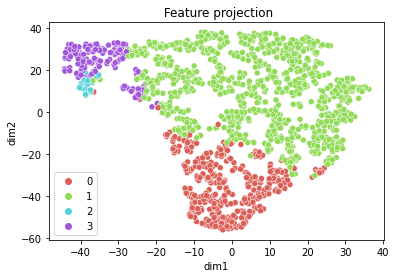

In [40]:
df = pd.DataFrame()
df["y"] = y
df["dim1"] = z[:,0]
df["dim2"] = z[:,1]

sns.scatterplot(x="dim1", y="dim2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df).set(title=" Feature projection")